In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Results_21Mar2022.csv')

print(data)



       mc_run_id           grouping  mean_ghgs  mean_land  mean_watscar  \
0              1  fish_female_20-29   5.421821   8.612772   14165.86240   
1              1  fish_female_30-39   5.436673   8.680248   15222.77063   
2              1  fish_female_40-49   5.289333   8.467723   15818.80068   
3              1  fish_female_50-59   5.169020   8.219199   16962.06009   
4              1  fish_female_60-69   5.380268   8.570718   18212.66232   
...          ...                ...        ...        ...           ...   
71995       1000  veggie_male_30-39   6.615301  11.385959   13374.38105   
71996       1000  veggie_male_40-49   6.185949  10.566347   12959.68443   
71997       1000  veggie_male_50-59   5.871454   9.806539   11924.19092   
71998       1000  veggie_male_60-69   5.922496   9.873027   11310.87733   
71999       1000  veggie_male_70-79   6.339353  10.383692   11259.04221   

        mean_eut  mean_ghgs_ch4  mean_ghgs_n2o    mean_bio  mean_watuse  ...  \
0      23.945372   

In [2]:
print("Data types for each column:")
print(data.dtypes)

Data types for each column:
mc_run_id           int64
grouping           object
mean_ghgs         float64
mean_land         float64
mean_watscar      float64
mean_eut          float64
mean_ghgs_ch4     float64
mean_ghgs_n2o     float64
mean_bio          float64
mean_watuse       float64
mean_acid         float64
sd_ghgs           float64
sd_land           float64
sd_watscar        float64
sd_eut            float64
sd_ghgs_ch4       float64
sd_ghgs_n2o       float64
sd_bio            float64
sd_watuse         float64
sd_acid           float64
n_participants      int64
sex                object
diet_group         object
age_group          object
dtype: object


In [21]:
# Check the number of missing values in each column
missing_values_count = data.isnull().sum()
print("Number of missing values per column:")
print(missing_values_count)

# Check if there are any missing values in the dataset
has_missing_values = data.isnull().values.any()
if has_missing_values:
    print("There are missing values")
else:
    print("There are no missing values")


Number of missing values per column:
diet_group       0
mean_acid        0
mean_bio         0
mean_eut         0
mean_ghgs        0
mean_ghgs_ch4    0
mean_ghgs_n2o    0
mean_land        0
mean_watscar     0
mean_watuse      0
dtype: int64
There are no missing values


In [5]:
import pandas as pd

# Load the data
data = pd.read_csv('Results_21Mar2022.csv')

# List numerical columns to sum, excluding categorical and ID columns
numeric_cols = data.columns.difference(['mc_run_id', 'grouping', 'sex', 'diet_group', 'age_group'])

# Group by 'sex', 'diet_group', 'age_group', and sum numerical columns
summed_data = data.groupby(['sex', 'diet_group', 'age_group'])[numeric_cols].sum().reset_index()

# Divide the results of all numerical columns by 1000
summed_data[numeric_cols] = summed_data[numeric_cols] / 1000

# View the results
print(summed_data)



       sex diet_group age_group  mean_acid    mean_bio   mean_eut  mean_ghgs  \
0   female       fish     20-29  22.770956  248.135212  20.985464   4.902947   
1   female       fish     30-39  23.257771  249.827684  20.948442   4.942664   
2   female       fish     40-49  23.470170  252.846922  20.713798   4.927040   
3   female       fish     50-59  23.652474  246.789912  20.989284   4.944320   
4   female       fish     60-69  24.455240  258.645759  21.569322   5.103823   
..     ...        ...       ...        ...         ...        ...        ...   
67    male     veggie     30-39  22.864091  266.148897  18.988080   4.807758   
68    male     veggie     40-49  21.866199  251.351926  18.275813   4.610379   
69    male     veggie     50-59  21.186608  244.248429  17.619071   4.455095   
70    male     veggie     60-69  21.321332  248.603854  17.543012   4.444844   
71    male     veggie     70-79  22.133811  259.421351  18.283813   4.612451   

    mean_ghgs_ch4  mean_ghgs_n2o  mean_

In [6]:
summed_data.to_csv('mean_data.csv', index=False)

print("The average data by diet group has been saved to 'mean_data.csv'")

The average data by diet group has been saved to 'mean_data.csv'


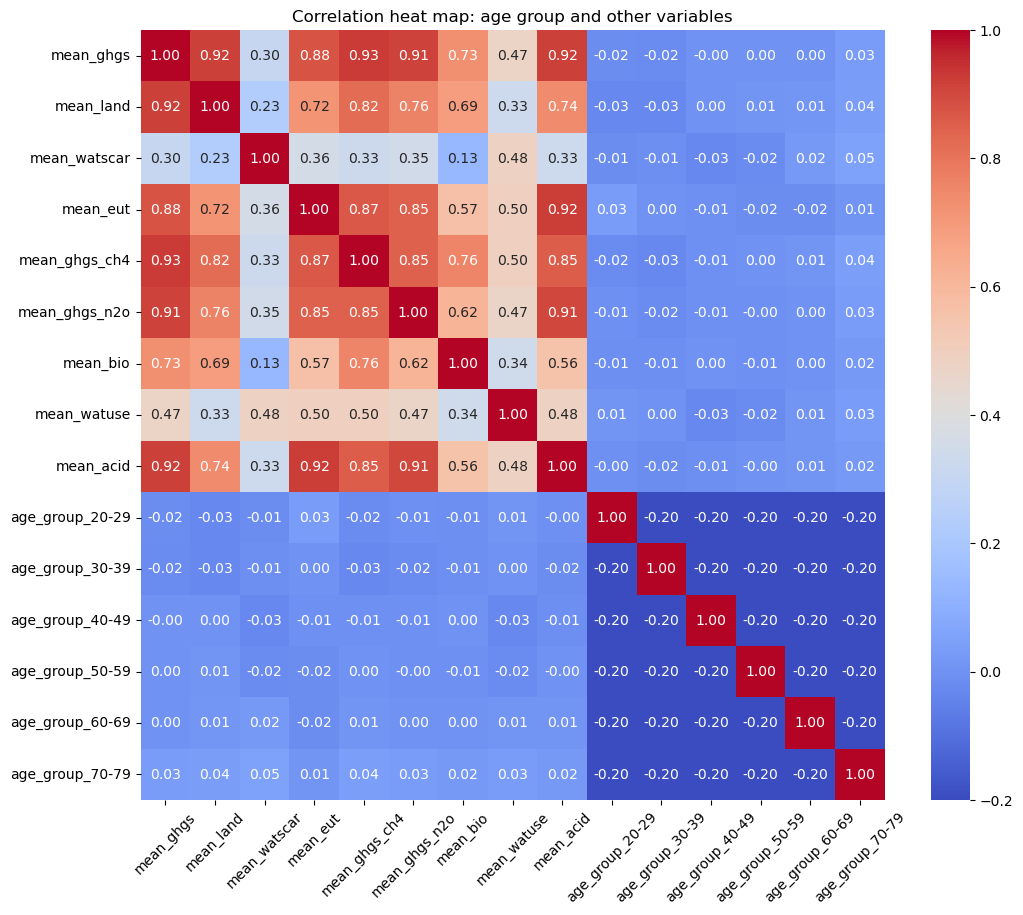

In [7]:

# Convert the 'age_group' column to dummy variables
data = pd.get_dummies(data, columns=['age_group'])

# Select columns for correlation analysis
columns_of_interest = [
    'mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 
    'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid'
] + [col for col in data.columns if 'age_group' in col]

# Calculate the Pearson correlation coefficient matrix for these columns
correlation_matrix = data[columns_of_interest].corr()

# Plot a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation heat map: age group and other variables')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


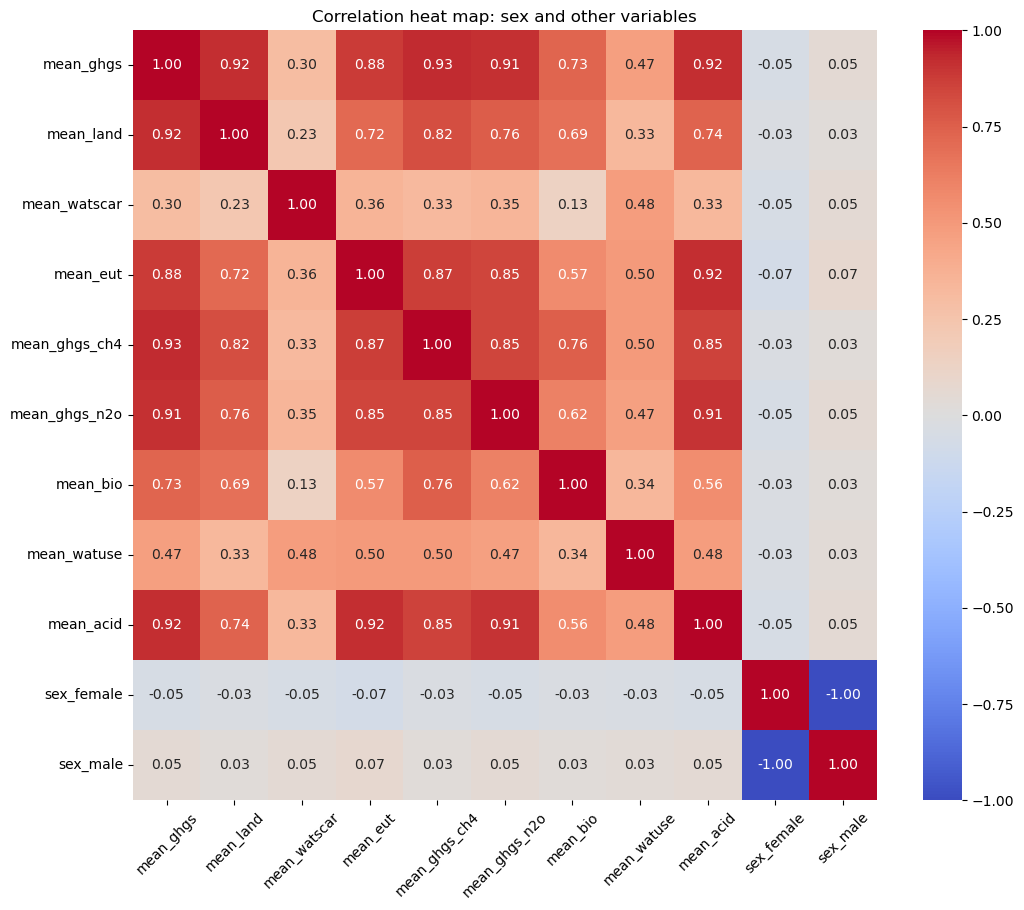

In [8]:

# Convert the 'sex' column to dummy variables
data = pd.get_dummies(data, columns=['sex'], drop_first=False)

# Select columns for correlation analysis
columns_of_interest = [
    'mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 
    'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid'
] + [col for col in data.columns if 'sex' in col]

# Calculate the Pearson correlation coefficient matrix for these columns
correlation_matrix = data[columns_of_interest].corr()

# Plot a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation heat map: sex and other variables')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



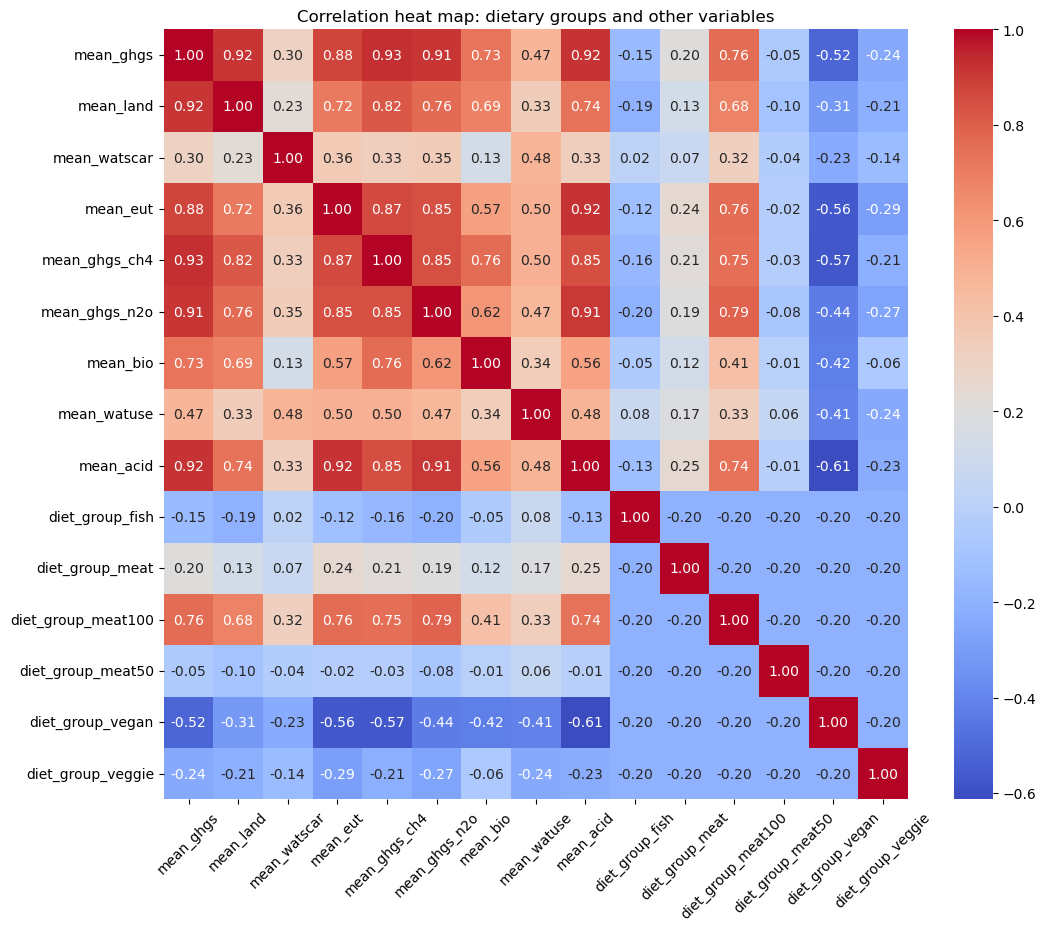

In [9]:


# Convert the 'diet_group' column to dummy variables
data = pd.get_dummies(data, columns=['diet_group'], drop_first=False)

# Select columns for correlation analysis
columns_of_interest = [
    'mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 
    'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid'
] + [col for col in data.columns if 'diet_group' in col]

# Calculate the Pearson correlation coefficient matrix for these columns
correlation_matrix = data[columns_of_interest].corr()

# Plot a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation heat map: dietary groups and other variables')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [10]:

# Define columns for environmental impact indicators
impact_columns = [
    'mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 
    'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid'
]

# Calculate correlation matrices
correlation_matrix_age = data[[col for col in data.columns if 'age_group' in col] + impact_columns].corr()
correlation_matrix_sex = data[[col for col in data.columns if 'sex' in col] + impact_columns].corr()
correlation_matrix_diet = data[[col for col in data.columns if 'diet_group' in col] + impact_columns].corr()

# Extract correlations
age_correlations = correlation_matrix_age.loc[impact_columns, correlation_matrix_age.columns.str.contains('age_group')].abs().mean(axis=1)
sex_correlations = correlation_matrix_sex.loc[impact_columns, correlation_matrix_sex.columns.str.contains('sex')].abs().mean(axis=1)
diet_correlations = correlation_matrix_diet.loc[impact_columns, correlation_matrix_diet.columns.str.contains('diet_group')].abs().mean(axis=1)

# Compare correlations
comparison_df = pd.DataFrame({
    'Age Group Correlation': age_correlations,
    'Sex Correlation': sex_correlations,
    'Diet Group Correlation': diet_correlations
})

# Output the results
print(comparison_df)



               Age Group Correlation  Sex Correlation  Diet Group Correlation
mean_ghgs                   0.012077         0.047972                0.319944
mean_land                   0.019550         0.027878                0.269691
mean_watscar                0.024447         0.050987                0.139039
mean_eut                    0.012925         0.070819                0.333222
mean_ghgs_ch4               0.018625         0.026040                0.321674
mean_ghgs_n2o               0.011652         0.049176                0.327891
mean_bio                    0.008221         0.030868                0.179690
mean_watuse                 0.016746         0.031706                0.215524
mean_acid                   0.009860         0.048801                0.329028


In [11]:
comparison_df.to_csv('correlation_comparison.csv', index_label='Impact Factor')

print("The average data by diet group has been saved to 'correlation_comparison.csv'")

The average data by diet group has been saved to 'correlation_comparison.csv'


In [12]:
import pandas as pd

# Load the data
data = pd.read_csv('Results_21Mar2022.csv')

# List numerical columns to calculate the average, excluding categorical and ID columns
numeric_cols = data.columns.difference(['mc_run_id', 'grouping', 'sex', 'diet_group', 'age_group'])

# Group by 'diet_group' and 'sex', and calculate the mean for numerical columns
average_data = data.groupby(['diet_group','sex'])[numeric_cols].mean().reset_index()

# View the results
print(average_data)



   diet_group     sex  mean_acid    mean_bio   mean_eut  mean_ghgs  \
0        fish  female  23.566312  252.598677  21.039700   4.968593   
1        fish    male  24.637250  262.109388  22.421531   5.298139   
2        meat  female  33.365214  312.804638  29.514263   7.378604   
3        meat    male  34.633258  325.083693  31.121285   7.729363   
4     meat100  female  45.566615  412.863792  40.497945  11.156778   
5     meat100    male  47.992861  431.137816  44.019647  11.694952   
6      meat50  female  26.648960  266.121553  23.520508   5.653610   
7      meat50    male  27.696799  279.146758  24.643014   5.940835   
8       vegan  female  11.518848  124.951898  11.342248   2.595872   
9       vegan    male  11.678317  123.783734  11.580149   2.629250   
10     veggie  female  21.244554  249.389861  17.365486   4.398438   
11     veggie    male  22.083737  256.334069  18.367171   4.638384   

    mean_ghgs_ch4  mean_ghgs_n2o  mean_land  mean_watscar  ...  \
0        0.848570      

In [13]:
average_data.to_csv('average_data_by_diet_group.csv', index=False)

print("The average data by diet group has been saved to 'average_data_by_diet_group.csv'")

The average data by diet group has been saved to 'average_data_by_diet_group.csv'


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('Raincloud.csv')  # Replace with your file path

# Create a StandardScaler object
scaler = StandardScaler()

# Define columns to be scaled
columns_to_scale = [
    'mean_acid', 'mean_bio', 'mean_eut', 'mean_ghgs', 'mean_ghgs_ch4',
    'mean_ghgs_n2o', 'mean_land', 'mean_watscar', 'mean_watuse'
]

# Apply standardization
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the head of the processed data
print(data.head())


       diet_group  mean_acid  mean_bio  mean_eut  mean_ghgs  mean_ghgs_ch4  \
0    fish  female  -0.365149 -0.249022 -0.365416  -0.433766      -0.408053   
1       fish male  -0.267053 -0.141832 -0.224359  -0.315136      -0.376276   
2     meat female   0.532414  0.429526  0.499665   0.433787       0.476932   
3       meat male   0.648564  0.567917  0.663710   0.560053       0.561939   
4  meat100 female   1.650041  1.557238  1.620878   1.793850       1.750097   

   mean_ghgs_n2o  mean_land  mean_watscar  mean_watuse  
0      -0.542582  -0.605436     -0.079282     0.221873  
1      -0.451126  -0.541079      0.288976     0.440407  
2       0.419378   0.327886      0.340308     0.680101  
3       0.546988   0.427501      0.494456     0.717315  
4       1.830546   1.972223      1.655372     1.260451  


In [8]:

pip install plotly --upgrade


Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import plotly.express as px

# Load the data
data = pd.read_csv('Transposed_Raincloud.csv')
data_transposed = data.set_index('diet_group').transpose().reset_index().rename(columns={'index': 'Diet Type'})

# Plot a parallel coordinates plot
fig = px.parallel_coordinates(data_transposed, 
                              dimensions=data_transposed.columns[1:],  # Use all columns except 'Diet Type'
                              color=data_transposed.columns[1],  # Use the first numerical column for color mapping
                              labels={col: col.replace('_', ' ').title() for col in data_transposed.columns},
                              color_continuous_scale=px.colors.diverging.Tealrose)

# Show the plot
fig.show()

# Load the data
data = pd.read_csv('Raincloud.csv')

# Clean the data by removing unwanted columns, assuming here we're removing all columns named 'Unnamed'
data_cleaned = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])

# Set the diet group names as index
data_cleaned.set_index('diet_group', inplace=True)

# Calculate the standard deviation for each diet group across all environmental factors
standard_deviations = data_cleaned.std(axis=1)

top_two_impact_diet_groups = standard_deviations.nlargest(2)

print(f"Names of diet groups with the most significant environmental impact: {top_two_impact_diet_groups.index.tolist()}")


Names of diet groups with the most significant environmental impact: ['meat100 male', 'meat100 female']
